In [32]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
import cv2
from PIL import Image
from sklearn import metrics 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime


In [33]:

def plot_performance(history = None, save_fig = None, ylim_pad = [0,0]):
    xlabel = 'Epoch'
    ylabel = 'Accuracy'
    legend = ['Training', 'Validation']

    plt.figure(figsize=(10, 5))


    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]

    plt.subplot(1, 2, 1)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(min_y, max_y)
    plt.legend(legend, loc='lower right')

    plt.grid(True)

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]

    plt.subplot(1, 2, 2)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss')
    plt.xlabel(xlabel)
    plt.ylabel('Loss')
    plt.ylim(min_y, max_y)
    plt.legend(legend, loc='upper right')
    plt.grid(True)

    plt.show()
    plt.close()

In [34]:
# Loading Data
data = []
labels = []
classes = 42
cur_path = os.getcwd()
data_dir = os.path.join(cur_path, 'Data')
train_path = os.path.join(data_dir, 'train')

# Retrieving image from 'Data' folder
for index in range(classes):
    path = os.path.join(train_path, str(index))
    images = os.listdir(path)

    for img in images:
        try:
            image = Image.open(path + '/'+ img)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(index)
        except:
            print("Couldn't load image")

print(len(data))
print(len(labels))

data = np.array(data)
labels = np.array(labels)

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# One hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print(y_train)
    

38969
38969
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

In [36]:
with tf.device('/device:GPU:0'):
    epochs = 25
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))



Epoch 1/25
975/975 [==============================] - 69s 70ms/step - loss: 1.7612 - accuracy: 0.5679 - val_loss: 0.2758 - val_accuracy: 0.9428
Epoch 2/25
975/975 [==============================] - 64s 66ms/step - loss: 0.5188 - accuracy: 0.8555 - val_loss: 0.1321 - val_accuracy: 0.9596
Epoch 3/25
975/975 [==============================] - 68s 70ms/step - loss: 0.3224 - accuracy: 0.9075 - val_loss: 0.0930 - val_accuracy: 0.9758
Epoch 4/25
975/975 [==============================] - 62s 64ms/step - loss: 0.2646 - accuracy: 0.9266 - val_loss: 0.0582 - val_accuracy: 0.9841
Epoch 5/25
975/975 [==============================] - 67s 69ms/step - loss: 0.2282 - accuracy: 0.9379 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 6/25
975/975 [==============================] - 75s 77ms/step - loss: 0.2179 - accuracy: 0.9407 - val_loss: 0.0512 - val_accuracy: 0.9831
Epoch 7/25
975/975 [==============================] - 67s 69ms/step - loss: 0.2149 - accuracy: 0.9444 - val_loss: 0.0414 - val_accuracy:

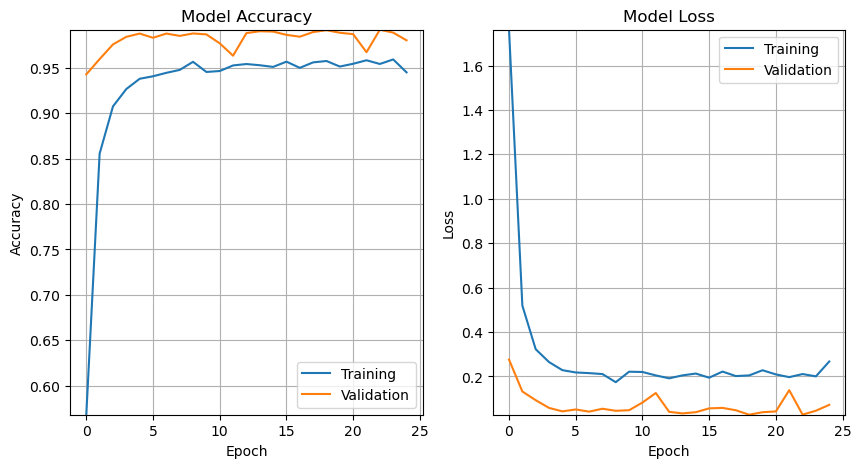

In [37]:
plot_performance(history)

In [38]:
y_test_data = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

labels = y_test_data['ClassId'].values
imgs = y_test_data['Path'].values
data = []

for img in imgs:
    path_to_img = os.path.join(data_dir, img)
    image = Image.open(path_to_img)
    # reshape image to 30x30
    image = image.resize([30,30])
    data.append(np.array(image))

X_test = np.array(data) 
# print(X_test)

In [39]:
with tf.device('/device:GPU:0'):
    predictions = np.argmax(model.predict(X_test), axis=-1)

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, predictions))

print(classification_report(labels, predictions))

395/395 [==============================] - 5s 12ms/step
0.9401425178147268
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.96      0.97      0.97       720
           2       0.96      0.97      0.96       750
           3       0.96      0.87      0.91       450
           4       0.99      0.95      0.97       660
           5       0.84      0.95      0.89       630
           6       0.85      0.73      0.79       150
           7       0.98      0.96      0.97       450
           8       0.92      0.98      0.95       450
           9       0.94      1.00      0.97       480
          10       0.97      0.96      0.97       660
          11       0.91      0.92      0.91       420
          12       0.98      0.98      0.98       690
          13       0.98      1.00      0.99       720
          14       0.98      0.99      0.99       270
          15       0.95      0.99      0.97       210
      

/home/emilt/anaconda3/envs/tf-gpu-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emilt/anaconda3/envs/tf-gpu-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emilt/anaconda3/envs/tf-gpu-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

1/1 [==============================] - 0s 56ms/step
The predicted class is 23


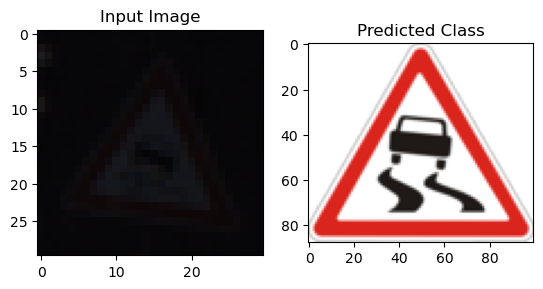

In [40]:
from keras.models import load_model

classificer = load_model('traffic_classifier.h5')

def preprocess_input_img(img):
    image = Image.open(img)
    image = image.resize((30,30))
    image = np.array(image)
    image = np.expand_dims(image, axis=0)
    return image

def get_class_image(class_no):
    Meta_dir = os.path.join(data_dir, 'Meta')
    img = os.path.join(Meta_dir, str(class_no) + '.png')
    img = Image.open(img)
    return img

input_img = preprocess_input_img('Data/test/00012.png')
prediction = int(np.argmax(classificer.predict(input_img), axis=-1))
print(f'The predicted class is {prediction}')
class_img = get_class_image(prediction)

plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_img[0])

plt.subplot(1, 2, 2)
plt.title('Predicted Class')
plt.imshow(class_img)


